## Week 3 - Image Recognition

### Heather Tweedie, 1/2/23

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.11.0


In [60]:
# load data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# re-scale inputs
train_images=train_images/255.0
test_images=test_images/255.0

In [61]:
def display_image_array(imageIndex):  
    """
    Displays a grid of images from the train_images data set.
    
    Args:
        imageIndex: The indices of the images to be plotted."""  
    numcols = int(math.sqrt(len(imageIndex)))
    if numcols * numcols < len(imageIndex):
        numcols = numcols + 1
    BigImage = np.zeros([28 * numcols, 28 * numcols])
    for j in range(len(imageIndex)):
        x = (j % numcols) * 28
        y = int(j / numcols) * 28
        BigImage[x:x+28, y:y+28] = train_images[imageIndex[j]]
    plt.imshow(BigImage,interpolation='nearest', cmap='binary')
    plt.axis('off')
    plt.show()

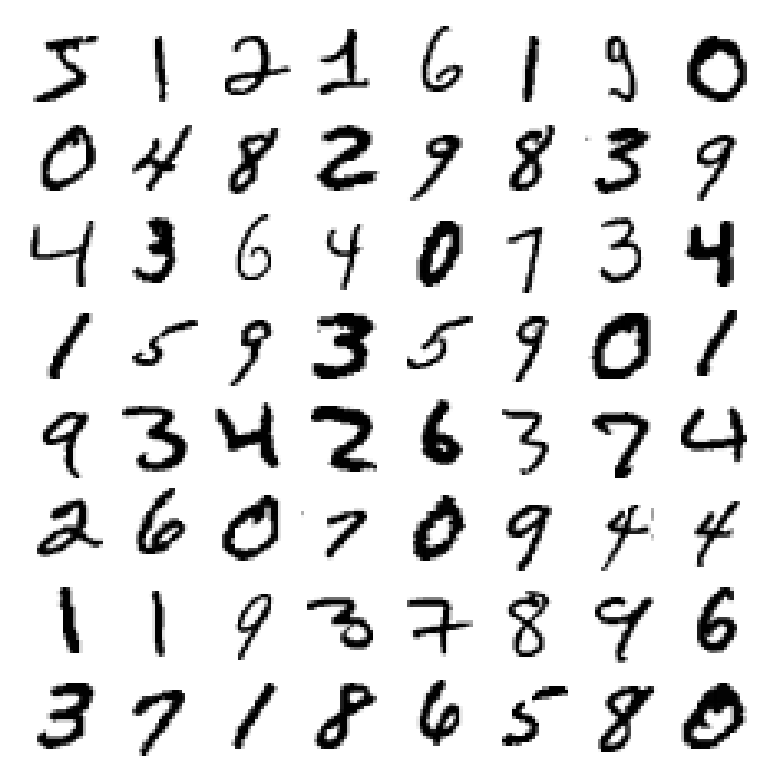

In [62]:
imageIndex = range(64)
display_image_array(imageIndex)

In [63]:
def addNoise(image, y_noise):
    """
    Adds a random noise contribution drawn from a uniform distribution between 0 and a user-defined maximum to an image.
    
    Args:
        image: the image to which the noise will be added
        y_noise: the maximum value for the uniform distribution from which the random noise contribution will be drawn

    Returns:
        newImage: the new image with noise added
    """
    if y_noise < 0 or y_noise > 3:
        raise ValueError('Invalid input. y_noise should be between 0 and 3 inclusive.')

    # get image dimensions
    image_x = len(image[1,:])
    image_y = len(image[:,1])

    newImage = np.empty([image_x, image_y])
    for i in range(len(image[1,:])):
        for j in range(len(image[i])):
            newImage[i,j] = image[i,j] + np.random.uniform(0, y_noise)

    return newImage
    


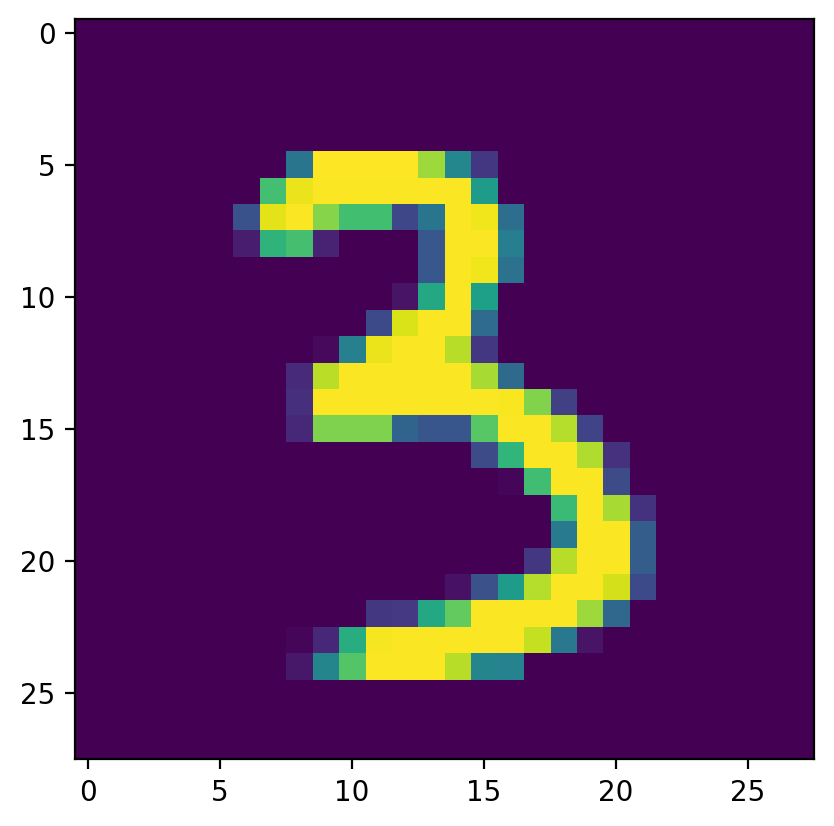

In [68]:
newImage = addNoise(test_images[32], 0)
plt.imshow(newImage)
